# Laboratorio 1

## Angello Josué Almengor
## 22003729

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img = cv2.imread("lago.jpg") 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

<function matplotlib.pyplot.show(close=None, block=None)>

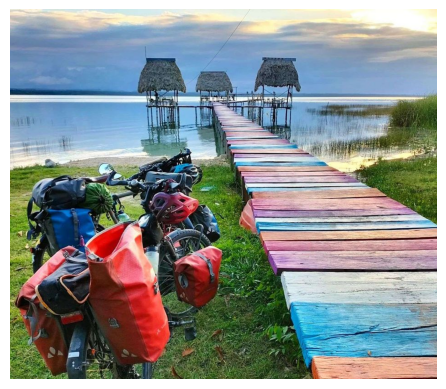

In [8]:
plt.imshow(img)
plt.axis('off')
plt.show

## Problema 1

In [31]:
def cambiar_color(img, color):
    img_salida = np.zeros_like(img)
    alto = img.shape[0]
    ancho = img.shape[1]

    for i in range (0, alto):
        for j in range (0, ancho):
            pixel = img[i, j]

            blue = pixel [2]
            green = pixel [1]
            red = pixel[0]

            if color == 1:
                img_salida[i, j] = [0, 0, blue]  # únicamente el color azul.
            elif color == 2:
                img_salida[i, j] = [0, green, 0]  # únicamente el color verde.
            elif color == 3:
                img_salida[i, j] = [red, 0, 0]  # únicamente el color rojo.
            elif color == 10:
                img_salida[i, j] = [red, green, 0]  # únicamente los colores rojo y verde
            elif color == 20:
                img_salida[i, j] = [0, green, blue]  # únicamente los colores verde y azul
            elif color == 30:
                img_salida[i, j] = [red, 0, blue]  # únicamente los colores azul y rojo

    return img_salida

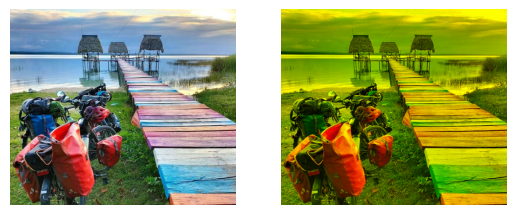

In [32]:
# Inicializar el valor de color
color = 10

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img) # imagen original

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img_modificada) # imagen modificada

## Problema 2

In [33]:
def reconstruir_imagen(img_rojo, img_verde, img_azul):

    # Crear una imagen vacía con tres canales
    img_color = np.zeros((img_rojo.shape[0], img_rojo.shape[1], 3), dtype=np.uint8)
    alto = img_rojo.shape[0]
    ancho = img_rojo.shape[1]

    for i in range(alto):
        for j in range(ancho):
            # Asignar cada imagen de escala de grises a su respectivo canal de color
            img_color[i, j] = [img_rojo[i, j], img_verde[i, j], img_azul[i, j]]
    
    return img_color

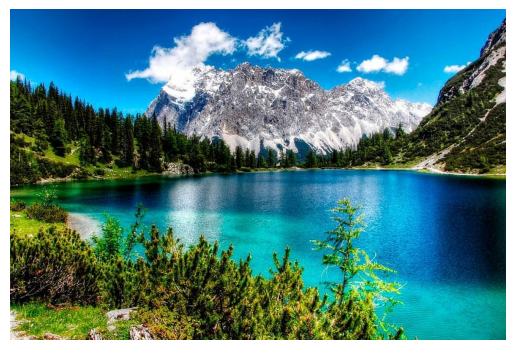

In [35]:
# Leer las imágenes en escala de grises
img_rojo = cv2.imread("imagen1_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
img_verde = cv2.imread("imagen1_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
img_azul = cv2.imread("imagen1_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

img_color = reconstruir_imagen( img_azul, img_verde, img_rojo) # Crear la imagen a color

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

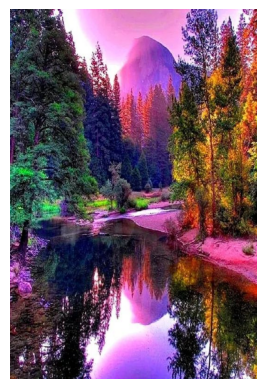

In [37]:
# Leer las imágenes en escala de grises
img_rojo = cv2.imread("imagen2_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
img_verde = cv2.imread("imagen2_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
img_azul = cv2.imread("imagen2_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

# Crear la imagen a color
img_color = reconstruir_imagen(img_azul, img_verde, img_rojo)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

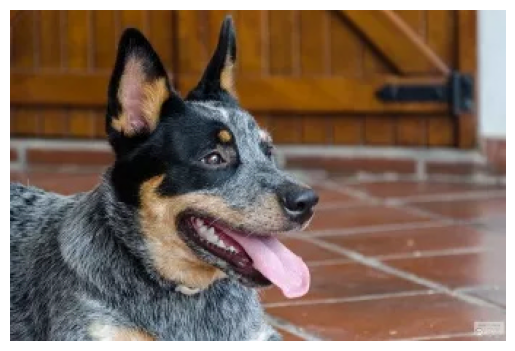

In [38]:
# Leer las imágenes en escala de grises
img_rojo = cv2.imread("perro_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
img_verde = cv2.imread("perro_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
img_azul = cv2.imread("perro_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

# Crear la imagen a color
img_color = reconstruir_imagen( img_azul, img_verde, img_rojo)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Problema 5

### Enfoque de escala de grises ponderado

El enfoque de escala de grises ponderado es una técnica utilizada para convertir una imagen en color a escala de grises, donde se asigna un peso diferente a cada uno de los canales de color (rojo, verde y azul) en función de su contribución percibida a la luminancia. Este método es más preciso que simplemente promediar los valores de los canales porque tiene en cuenta la sensibilidad del ojo humano a diferentes colores.

Por qué se utiliza el enfoque de escala de grises ponderado
El ojo humano no percibe todos los colores con la misma intensidad. Por ejemplo, somos más sensibles al verde que al azul o al rojo. Para reflejar esto en la conversión a escala de grises, se aplican coeficientes específicos a cada canal de color.

Fórmula del enfoque de escala de grises ponderado
Una fórmula comúnmente utilizada para calcular el valor de un píxel en escala de grises es:


Grayscale = 0.2989 × R + 0.5870 × G + 0.1140 × B

Donde 𝑅, 𝐺 y 𝐵 son los valores de los canales rojo, verde y azul, respectivamente.

## Problema 6

### En que consiste el espacio de color HSV y como se mapean colores a dicho espacio

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que se utiliza comúnmente en gráficos computacionales y aplicaciones de procesamiento de imágenes porque representa los colores de una manera que es más intuitiva para los seres humanos.

#### Componentes del espacio de color HSV

1. Hue (Tono): Representa el color puro y se mide en grados, en un rango de 0° a 360°. Cada valor de tono corresponde a un color específico en el círculo cromático:

0°: Rojo
60°: Amarillo
120°: Verde
180°: Cian
240°: Azul
300°: Magenta

2. Saturation (Saturación): Indica la pureza del color y se mide en porcentaje (0% a 100%). Un color con 0% de saturación es un tono de gris (sin color), mientras que un color con 100% de saturación es el color puro sin mezcla de blanco o negro.

3. Value (Valor o Brillo): Representa la luminosidad del color y también se mide en porcentaje (0% a 100%). Un valor de 0% es completamente negro, y un valor de 100% es el color más brillante (sin mezcla de negro).